# Classification de chiffres manuscrits – KNN

Ce notebook présente une étude du jeu de données Digits avec une approche structurée. Ce jeu de données est composé d'image noir et blanc de chiffre de 0 à 9 et provient de la librairie sklearn

## Librairies

In [19]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 1. Analyse et exploration du dataset

In [20]:
digits = load_digits()
X = digits.data
y = digits.target
# Afficher le nombre d'entrée et la forme de ces entrées
print(f"Nombre d'élément : {X.shape[0]} | Nombre de feature : {X.shape[1]}")

Nombre d'élément : 1797 | Nombre de feature : 64


Exemple de 10 éléments 

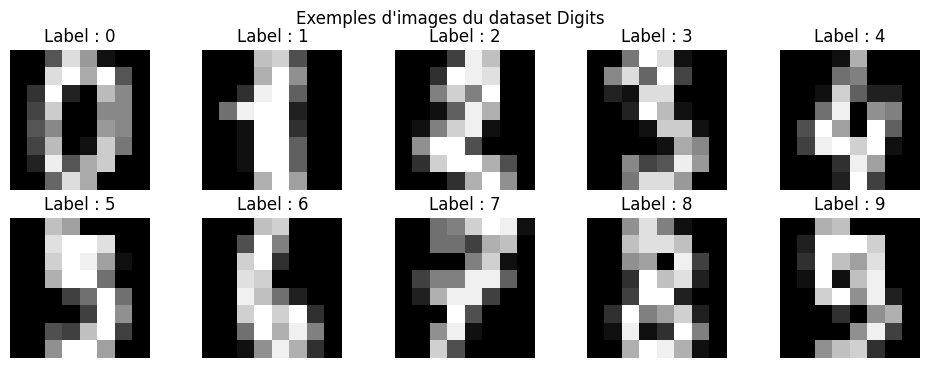

In [21]:
# Nombre d'images à afficher
n_images = 10

plt.figure(figsize=(12, 4))

for i in range(n_images):
    plt.subplot(2, 5, i + 1)
    plt.gray()
    plt.imshow(digits.images[i])
    plt.title(f"Label : {y[i]}")
    plt.axis('off')

plt.suptitle("Exemples d'images du dataset Digits")
plt.show()


a. Vérification de l'intégrité du dataset

In [22]:
# test de valeurs manquantes
# Vérification des NaN dans X
missing_values = np.isnan(X).sum()

if missing_values == 0:
    print("Aucune valeur manquante dans le dataset.")
else:
    print(f"Attention : {missing_values} valeurs manquantes détectées.")


Aucune valeur manquante dans le dataset.


b. Vérification de la répartition des clases

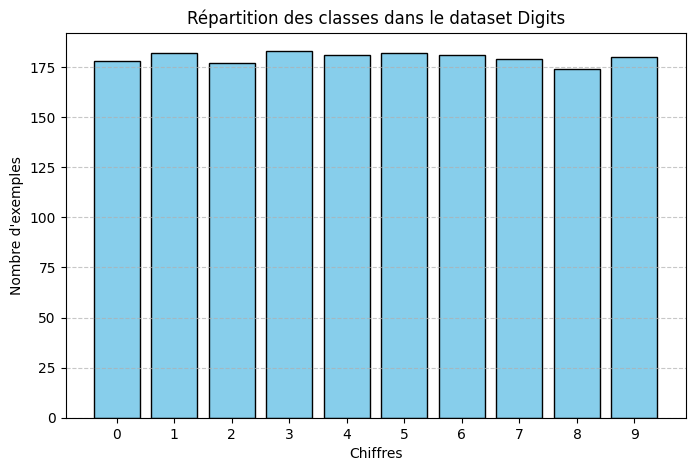

In [23]:
# Comptage des exemples par classe
classes, counts = np.unique(y, return_counts=True)

# Création de l'histogramme
plt.figure(figsize=(8,5))
plt.bar(classes, counts, color='skyblue', edgecolor='black')
plt.xlabel("Chiffres")
plt.ylabel("Nombre d'exemples")
plt.title("Répartition des classes dans le dataset Digits")
plt.xticks(classes)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Remarque : Nous avons des classes homogènes ce qui nous permet de pouvoir travailler sur ce dataset sans risque de biais lors de l'apprentissage.

En conclusion de cette analyse du dataset, on a un dataset contenant 1797 échantillons sans valeur manquante. Chaque échantillon étant une matrice de 64 pixels en nuance de gris.
La répartition des classes est homogène, ce qui est nécéssaire pour éviter les biais durant l'apprentissage.

Je suppose également que les variables sont indépendantes au vu du caractère du dataset.

La métrique principale que je cherche à optimiser est l'accuracy.

On a plusieurs classe, il est donc également intéréssant de regarder la matrice de confusion.

## 2. Classification avec KNN

2.a Découpage du dataset en 60% - 20% - 20% (entraînement - test - validation)

In [24]:
# 60 % train, 20 % test, 20 % validation
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# affichage de la taille de chaque base découpée
print("Train :", X_train.shape[0])
print("Test (hyperparamètres) :", X_test.shape[0])
print("Validation finale :", X_val.shape[0])


Train : 1078
Test (hyperparamètres) : 359
Validation finale : 360


2.b Pour le knn, l'hyperparamètre à optimiser est le k, le nombre de voisins à prendre en compte. Je vais donc rechercher le meilleur k à l'aide de la base d'entrainement qui servira pour l'apprentissage et la base de test pour les tests.

In [25]:
# Sélection du meilleur k du knn
# Utilisation de la base de test pour l'accuracy
k_values = range(1, 16)
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_test_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(acc)
    
    print(f"k = {k} --> Accuracy sur test : {acc:.4f}")

best_k = k_values[test_accuracies.index(max(test_accuracies))]
print("\nMeilleur k :", best_k, "avec accuracy =", max(test_accuracies))


k = 1 --> Accuracy sur test : 0.9777
k = 2 --> Accuracy sur test : 0.9694
k = 3 --> Accuracy sur test : 0.9805
k = 4 --> Accuracy sur test : 0.9777
k = 5 --> Accuracy sur test : 0.9721
k = 6 --> Accuracy sur test : 0.9721
k = 7 --> Accuracy sur test : 0.9694
k = 8 --> Accuracy sur test : 0.9721
k = 9 --> Accuracy sur test : 0.9721
k = 10 --> Accuracy sur test : 0.9749
k = 11 --> Accuracy sur test : 0.9749
k = 12 --> Accuracy sur test : 0.9749
k = 13 --> Accuracy sur test : 0.9694
k = 14 --> Accuracy sur test : 0.9721
k = 15 --> Accuracy sur test : 0.9666

Meilleur k : 3 avec accuracy = 0.9805013927576601


2.c Maintenant que l'on a le meilleur k on va pouvoir faire le "vrai" apprentissage

In [26]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

2.d Vérification de l'entrainement final avec la base de validation

Accuracy finale sur validation : 0.9861111111111112


<Figure size 800x800 with 0 Axes>

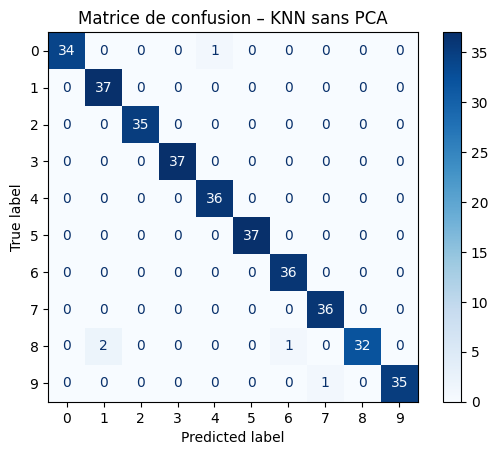

In [27]:
# Prédictions sur le jeu de validation
y_val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Accuracy finale sur validation :", val_accuracy)

# Matrice de confusion
cm = confusion_matrix(y_val, y_val_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=classes
)

plt.figure(figsize=(8,8))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion – KNN sans PCA")
plt.show()


Remarque : Ici on a de tout aussi bon résultats en accuracy que lorsque l'on a recherché le meilleur k. Cela indique qu'il n'y a probablement pas de sur-apprentissage. On a également une très bonne matrice de confusion avec très peu d'erreur. 

Petit code pour tester sur une image

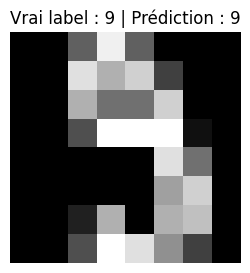

In [28]:
# Pour tester avec une image choisi à l'aide de son index
index = 8

image_flat = X_val[index]
true_label = y_val[index]

predicted_label = knn.predict(image_flat.reshape(1, -1))[0]

plt.figure(figsize=(3, 3))
plt.gray()
plt.imshow(image_flat.reshape(8, 8))
plt.title(f"Vrai label : {true_label} | Prédiction : {predicted_label}")
plt.axis('off')
plt.show()


On peut faire en bonus une visualisation du sur-apprentissage et à partir de quand il apparait.

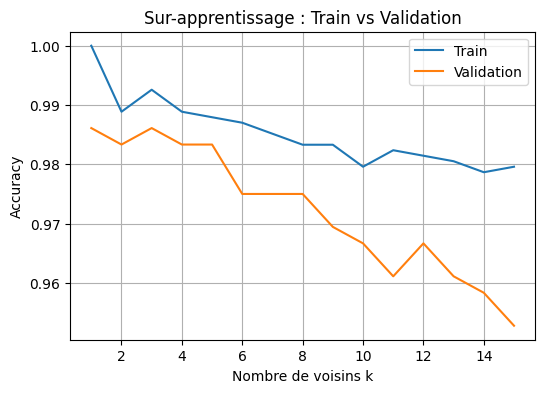

In [29]:
k_values = range(1, 16)
train_acc = []
val_acc = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, knn_temp.predict(X_train)))
    val_acc.append(accuracy_score(y_val, knn_temp.predict(X_val)))

plt.figure(figsize=(6,4))
plt.plot(k_values, train_acc, label="Train")
plt.plot(k_values, val_acc, label="Validation")
plt.xlabel("Nombre de voisins k")
plt.ylabel("Accuracy")
plt.title("Sur-apprentissage : Train vs Validation")
plt.legend()
plt.grid(True)
plt.show()


On remarque qu'un sur-apprentissage commence à se distinguer sur le graphe pour k > 8. 